# Градиентный спуск.

Реализуем градиентный спуск для линейной регрессии, а также изучим, как он ведёт себя при разных параметрах и с разными функциями потерь.

In [469]:
from typing import Iterable, List

import matplotlib.pyplot as plt
import numpy as np

## Часть 1. Градиентный спуск

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса.
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять градиент функции потерь по параметрам модели.

In [470]:
import abc


class BaseLoss(abc.ABC):
    """Базовый класс лосса"""

    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число - значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

**1.1** Реализуем класс `MSELoss`.


In [471]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        return np.mean(((X @ w) - y)**2)

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        size = X.shape[0]
        return 2/size * (X.T @ (X@w - y))

In [472]:

loss = MSELoss()

X = np.arange(200).reshape(20, 10)
y = np.arange(20)

w = np.arange(10)

print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(
    loss.calc_grad(X, y, w),
    np.array(
        [
            1163180.0,
            1172281.0,
            1181382.0,
            1190483.0,
            1199584.0,
            1208685.0,
            1217786.0,
            1226887.0,
            1235988.0,
            1245089.0,
        ]
    ),
), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


**1.2** Реализуем функцию `gradient_descent`.

In [473]:
def gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    n_iterations: int = 100000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) - начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) - матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) - вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int --сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) - история весов на каждом шаге
    """
    w = w_init
    res = []
    res.append(w)
    for i in range(n_iterations):
        vect = loss.calc_grad(X, y, w)
        w = w-lr*vect
        res.append(w)
    return res

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории.

In [474]:

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [475]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.58917680450264
0.8670644395649089


In [476]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(10, 8))
    plt.title("GD trajectory")
    plt.xlabel(r"$w_1$")
    plt.ylabel(r"$w_2$")
    plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect("equal")

    CS = plt.contour(
        A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r
    )
    CB = plt.colorbar(CS, shrink=0.8, extend="both")

    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

**1.8** Нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). 

Из построенных диаграм видно, что при lr = 0.0001 спуск идет очень медленно, при lr = 0.004 и 0.01 спуск идет быстрее, доходит до минимума, однако если при 0.004 спуск идет стабильно и не наблюдается скачков, то при 0.01 мы видим скачкообразные движения кривой, при значениях юольше этого, у нас веса очень большие и траекторию не видно на графике, а соответственно данное значение lr не оптимально. Наиболее оптимальное значение из данных - это 0.004

lr = 0.0001


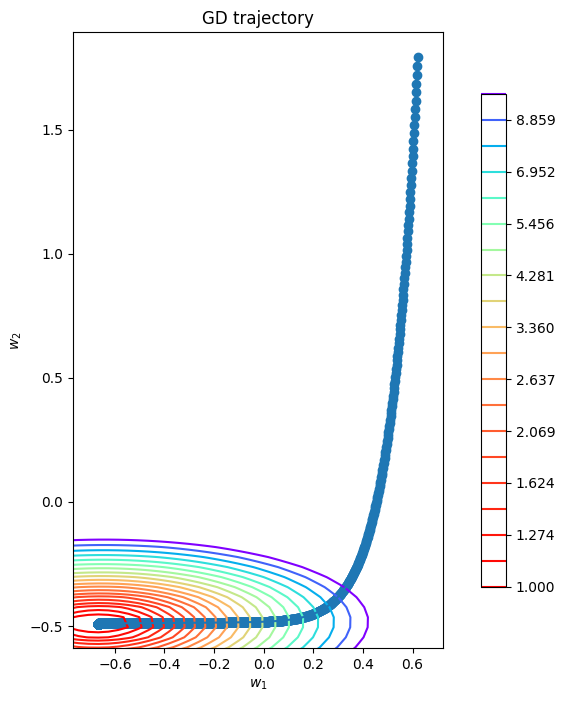

lr = 0.004


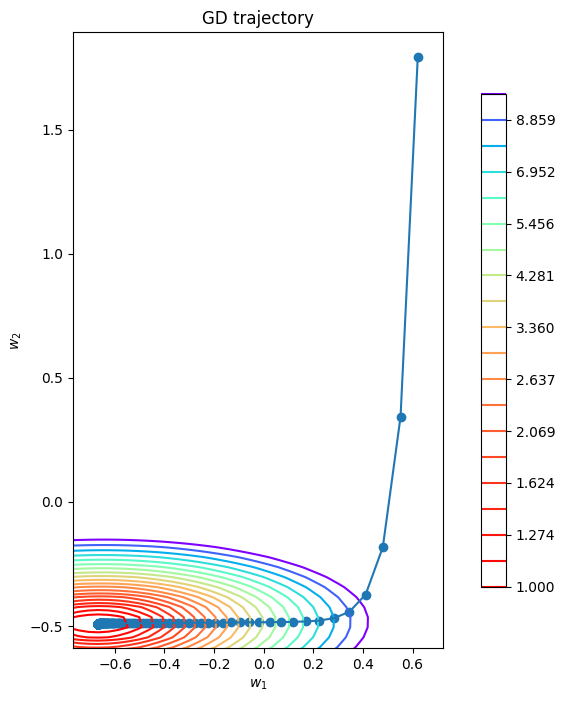

lr = 0.01


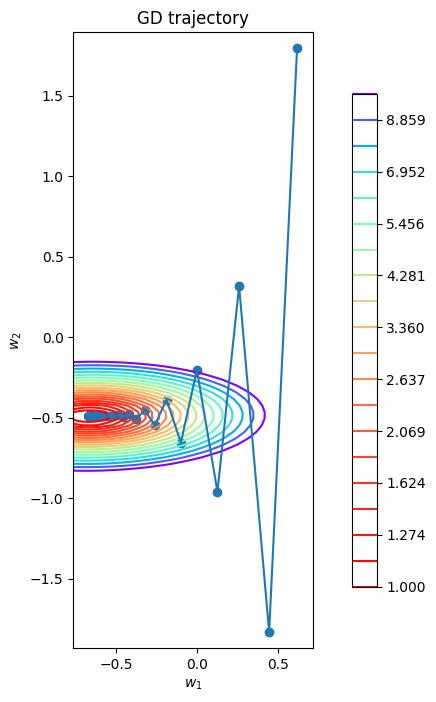

lr = 0.013


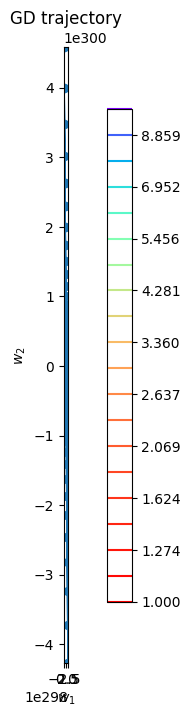

In [477]:
lr = [0.0001, 0.004, 0.01, 0.013]
loss = MSELoss()
for i in lr:
    w_list = gradient_descent(w_init, X, y, loss, i, 10000)
    print(f"lr = {i}")
    plot_gd(w_list, X, y, loss)

**1.4** Реализуем функцию `stochastic_gradient_descent`.


In [478]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    res = []
    w = w_init
    res.append(w)
    for i in range(n_iterations):
        batch = np.random.choice(len(y), size = batch_size, replace = False)
        X_batch = X[batch]
        y_batch = y[batch]
        vec = loss.calc_grad(X_batch, y_batch, w)
        w = w-lr*vec
        res.append(w)
    return res
        

**1.5** Нарисуем траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). 

При меньших lr спуск происходит медленне, но более стабильно, а при увеличении данного параметра, в спуске появляются скачки. Что касается batch_size, то при малых значениях, спуск происходит не очень стабильно, наблюдаются отклонения в разные стороны, а с увеличением значения, стабильность значительно повышается, однако скорость спуска также уменьшается. Что касается различий, то стохастический градиентный спуск более подвержен шуму, скачкам, он более неустойчивый, чем обычный, но скорость спуска стохастического больше, чем у обычного.

lr = 0.0001, size = 10


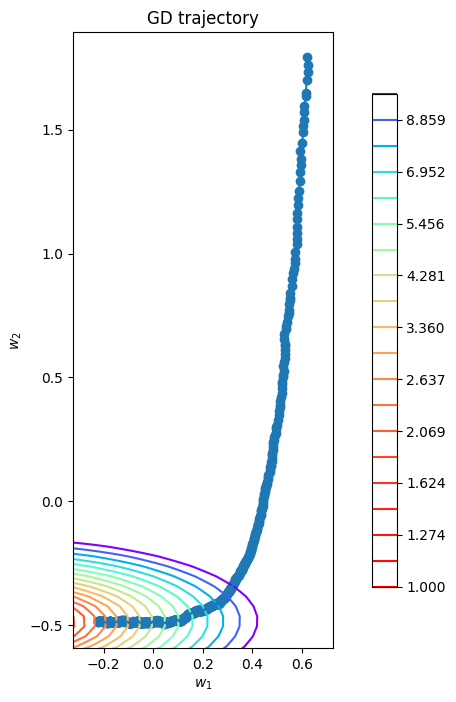

lr = 0.0001, size = 50


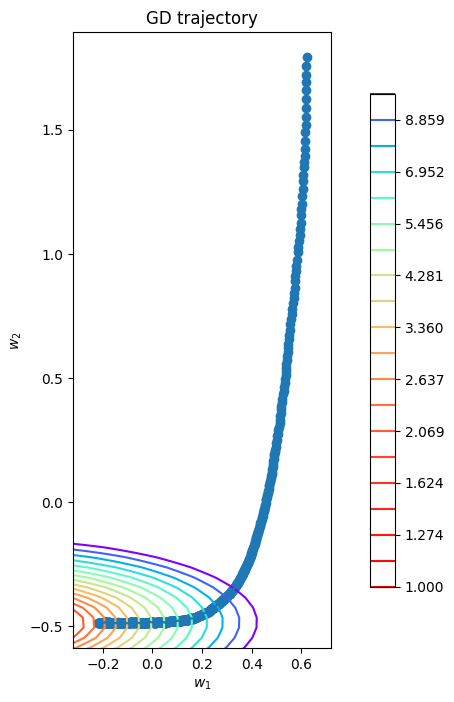

lr = 0.0001, size = 100


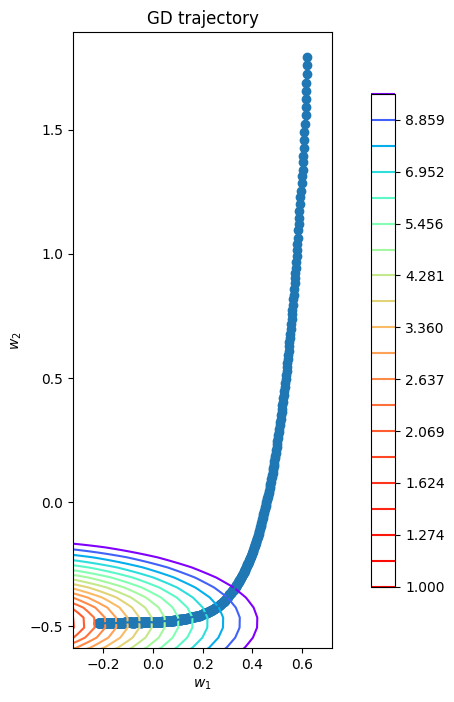

lr = 0.0001, size = 200


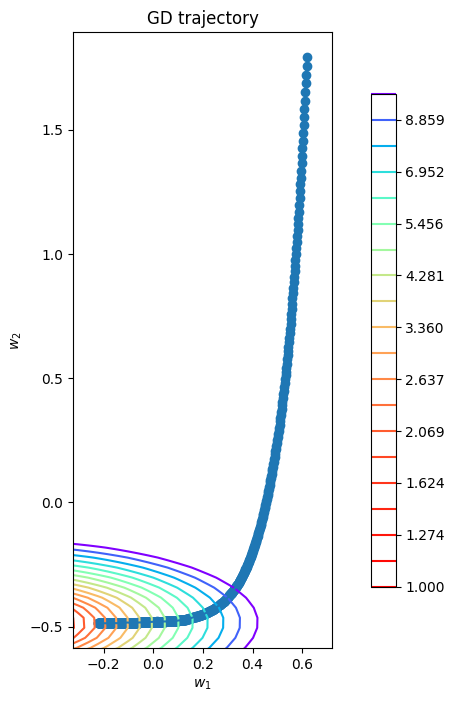

lr = 0.004, size = 10


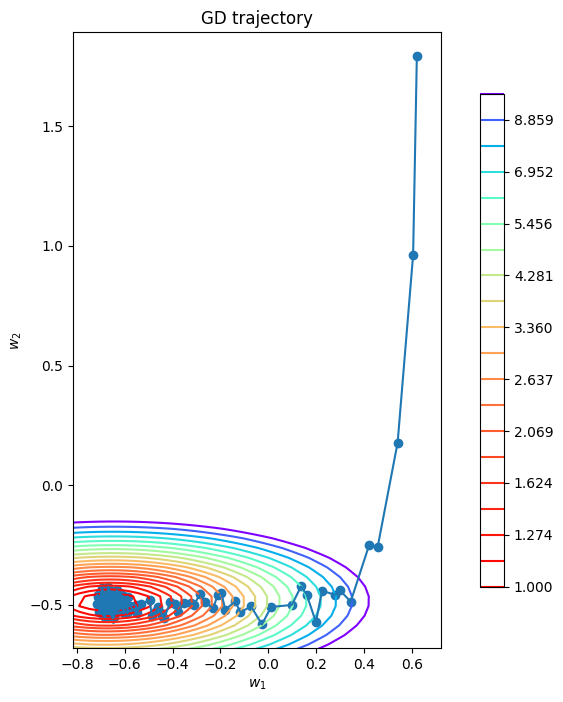

lr = 0.004, size = 50


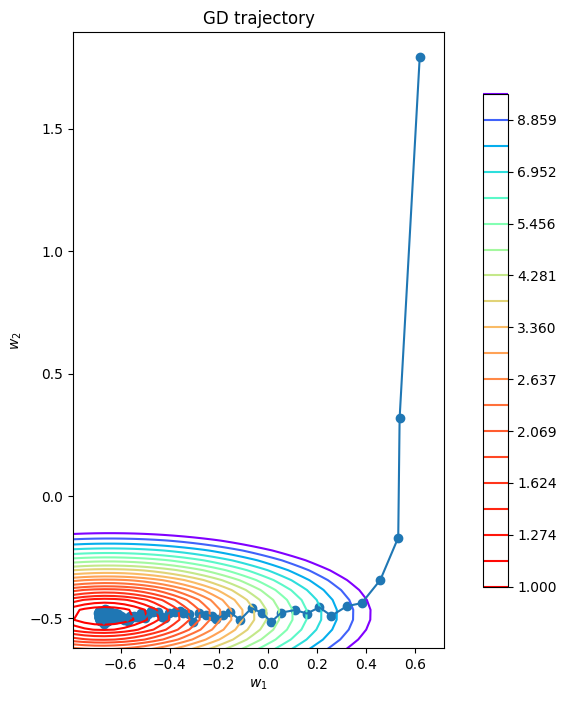

lr = 0.004, size = 100


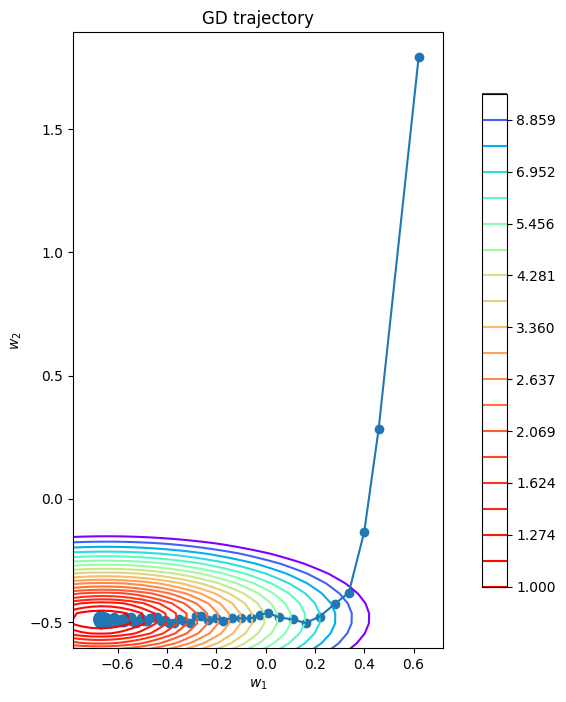

lr = 0.004, size = 200


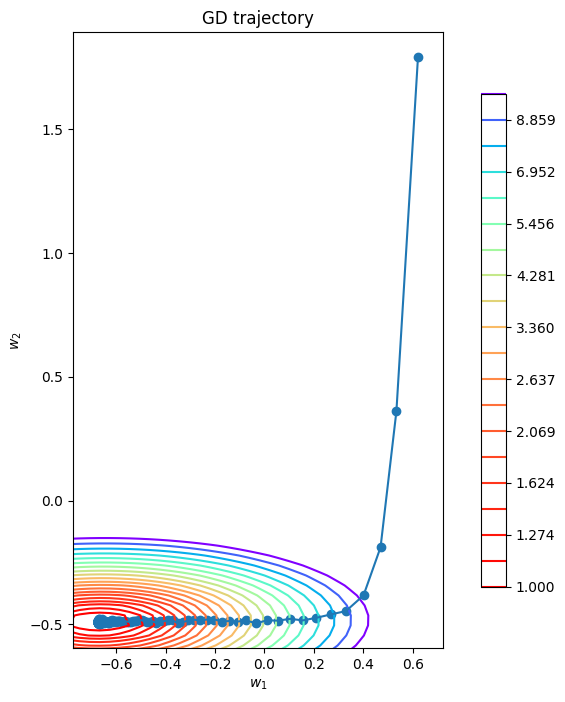

lr = 0.01, size = 10


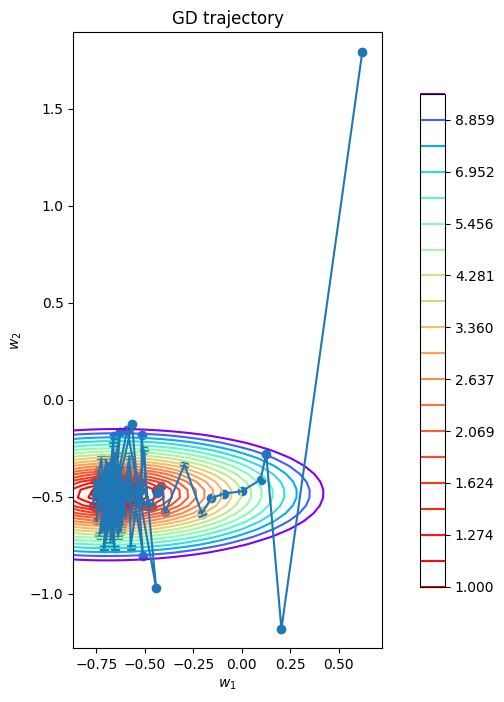

lr = 0.01, size = 50


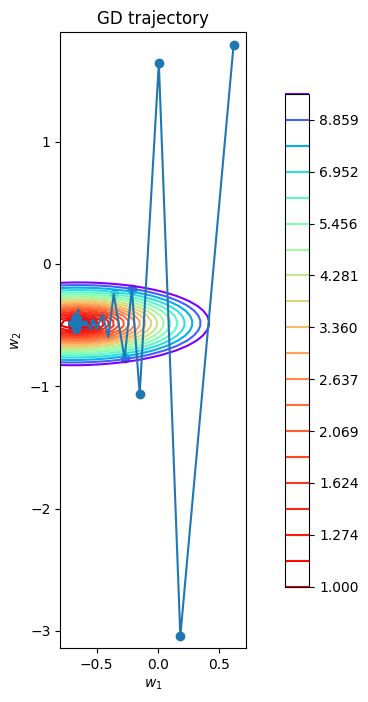

lr = 0.01, size = 100


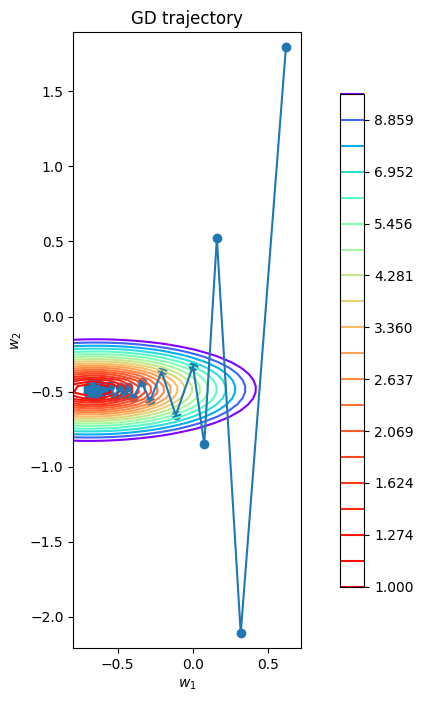

lr = 0.01, size = 200


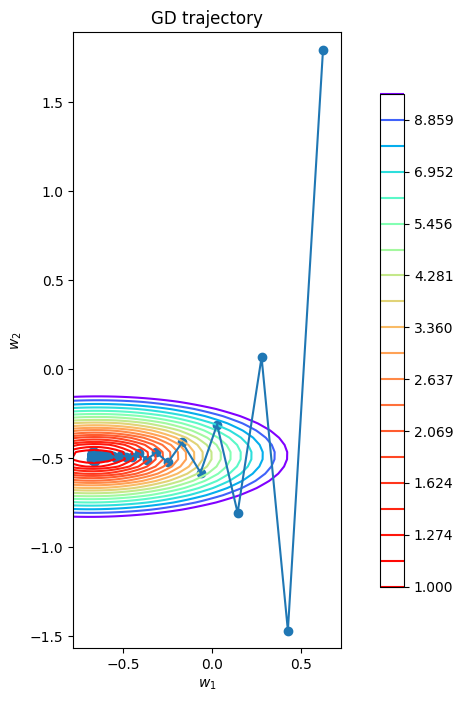

lr = 0.02, size = 10


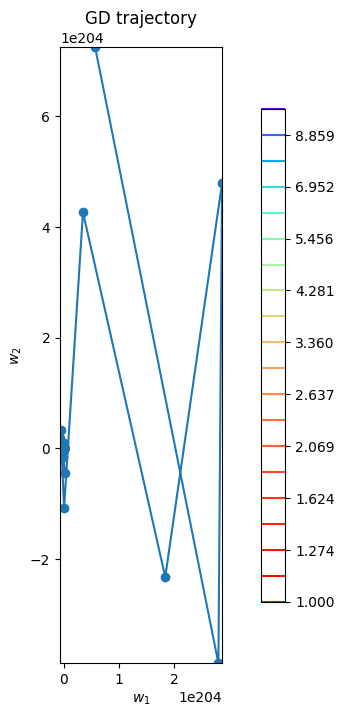

lr = 0.02, size = 50


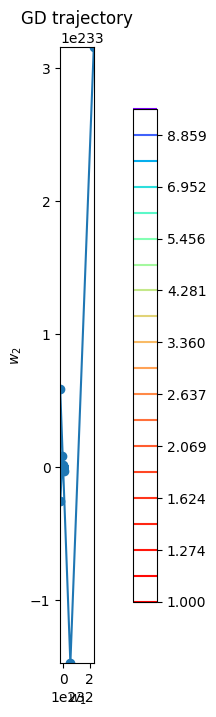

lr = 0.02, size = 100


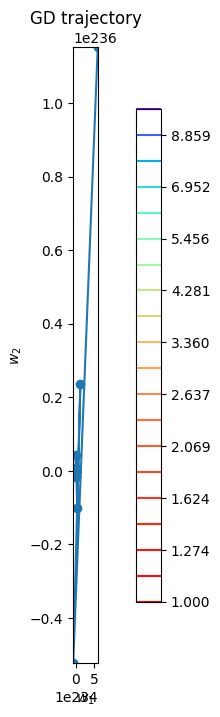

lr = 0.02, size = 200


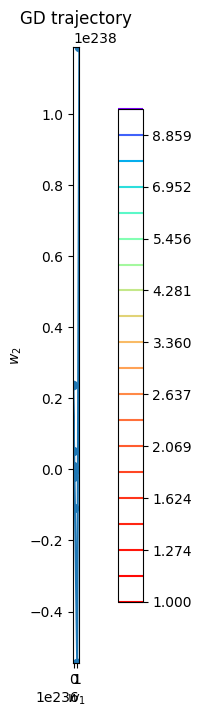

In [479]:
lr = [0.0001, 0.004, 0.01, 0.02]
size = [10, 50, 100, 200]
loss = MSELoss()

for i in lr:
    for j in size:
        w_list = stochastic_gradient_descent(w_init, X, y, loss, i, j, 700)
        print(f"lr = {i}, size = {j}")
        plot_gd(w_list, X, y, loss)

**1.6** Реализуем функцию `stochastic_gradient_descent` с затухающим шагом. Параметр $s_0$ возьмем равным 1.

In [480]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    p: float,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) - начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) - матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) - вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float - параметр величины шага, на который нужно домножать градиент
    :param batch_size: int - размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float - значение степени в формуле затухания длины шага
    :param n_iterations: int - сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) - история весов на каждом шаге
    """
    res = []
    w = w_init
    res.append(w)
    for i in range(n_iterations):
        batch = np.random.choice(len(y), size = batch_size, replace = False)
        X_batch = X[batch]
        y_batch = y[batch]
        vec = loss.calc_grad(X_batch, y_batch, w)
        step = lr * (1/(1+i))**p
        w = w-step*vec
        res.append(w)
    return res

**1.7** Нарисуем траекторию градиентного спуска для разных значений параметра `p`. 

Маленькие значения p способствуют большому количеству длинных шагов, что приводит к быстрой сходимости в начале, но и к возможности перепрыгнуть минимум в конце из-за шума, большие же значения p приводят к большей стабильности сходимости в конце обучения, однако есть шанс застревания в локальных минимумах.

p = 0.1


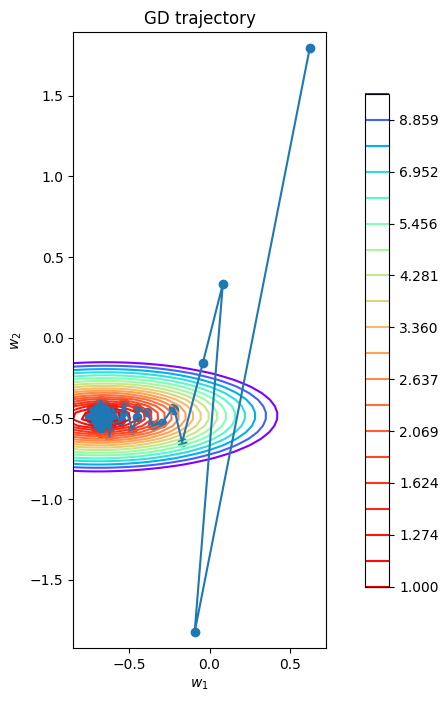

p = 0.25


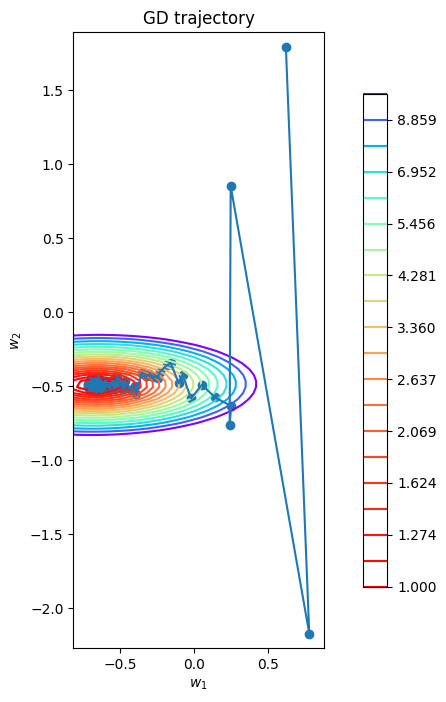

p = 0.4


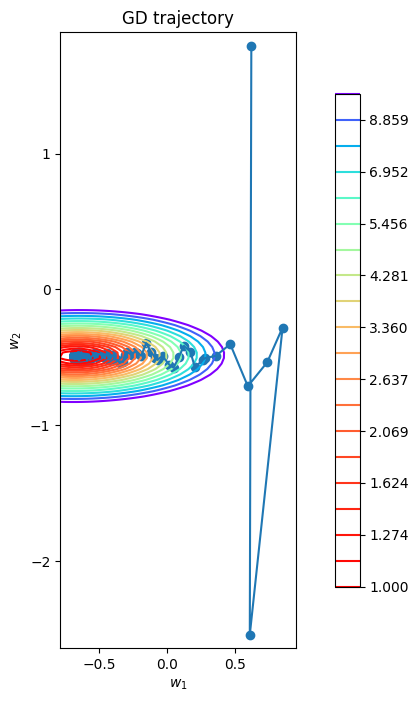

p = 0.8


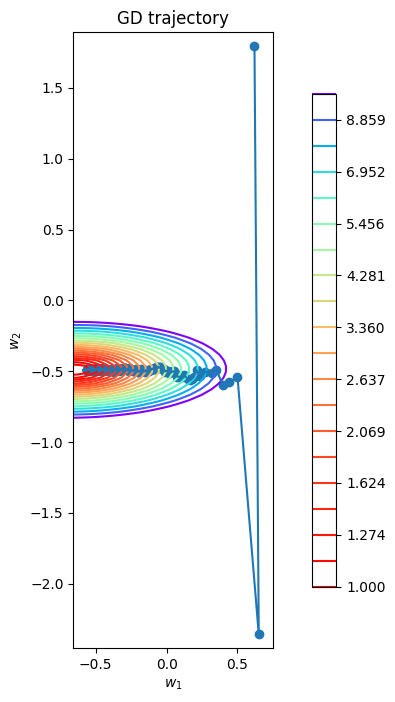

p = 1


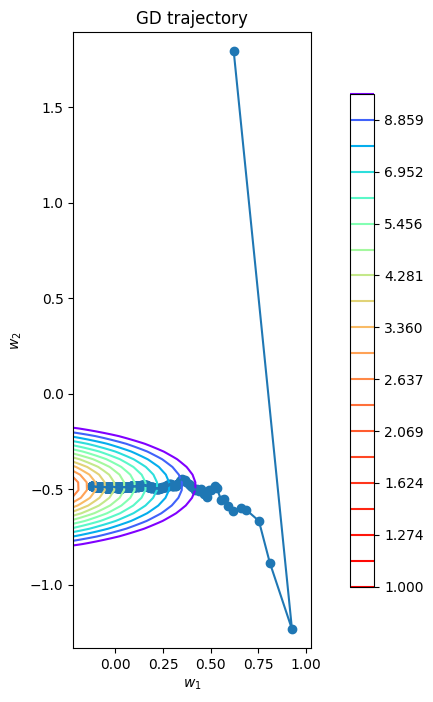

In [481]:
for i in [0.1, 0.25, 0.4, 0.8, 1]:
    w_list = stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, i, 1500)
    print(f'p = {i}')
    plot_gd(w_list, X, y, loss)

**1.8** Нарисуем график зависимости значения лосса от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмем равным 10.

По графику видно, что sgd чуть быстрее снижает на начальных этапах значение лосса, однако итоговая сходимость чуть хуже, чем у gd. Однако сильная разница не заметна из-за того, что размер датасета не очень большой, и к тому же это значит, что хорошо подобраны параметры lr и batch_size.

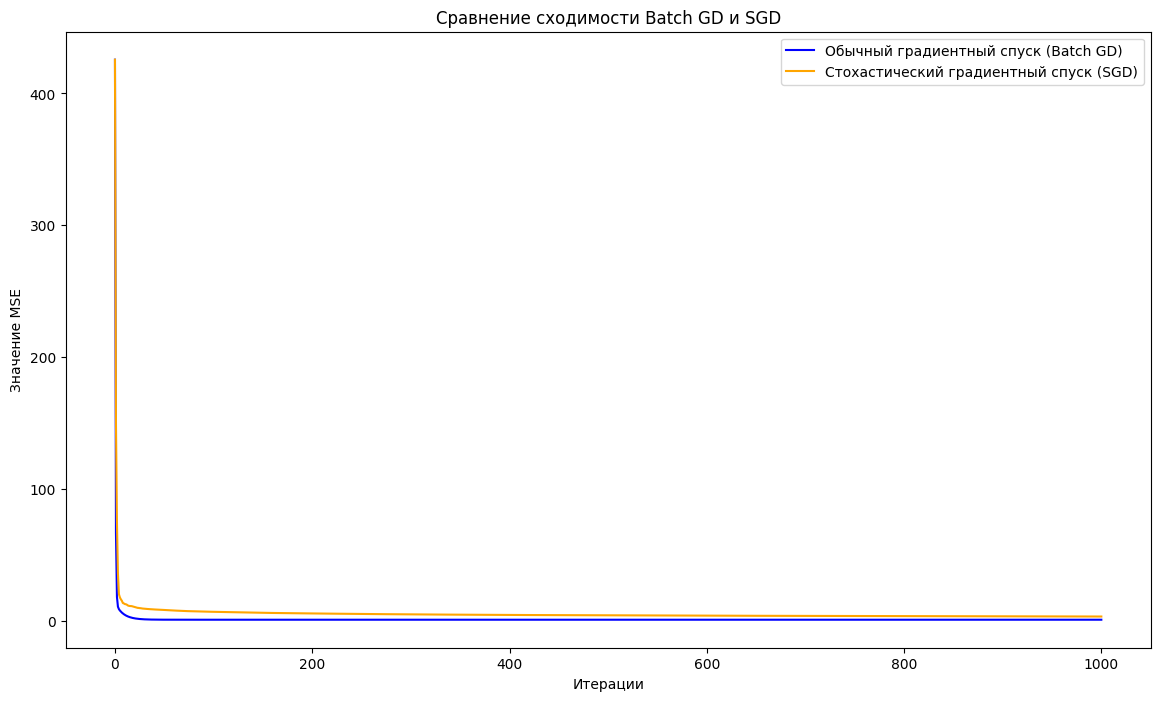

In [482]:
plt.figure(figsize = (14,8))
gd = gradient_descent(w_init, X, y, loss, 0.004, 1000)
sgd = stochastic_gradient_descent(w_init, X, y, loss, 0.004, 10, 0.8, 1000)
list_gd = [loss.calc_loss(X, y, w) for w in gd]
list_sgd = [loss.calc_loss(X, y, w) for w in sgd]
plt.plot(list_gd, label='Обычный градиентный спуск (Batch GD)', color='blue')
plt.plot(list_sgd, label='Стохастический градиентный спуск (SGD)', color='orange')
plt.xlabel('Итерации')
plt.ylabel('Значение MSE')
plt.title('Сравнение сходимости Batch GD и SGD')
plt.legend()
plt.show()


## Часть 2. Линейная регрессия

Теперь напишем класс для линейной регрессии. 

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`.

В методе `predict` мы будем применять нашу регрессию к датасету.

**2.1** 

In [483]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr

    def fit(self, X: np.ndarray, y: np.ndarray) -> "LinearRegression":
        X = np.asarray(X)
        y = np.asarray(y)
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        w_init = np.ones(X.shape[1])
        w_list = gradient_descent(w_init, X, y, self.loss, self.lr, 1000)
        self.w = w_list[-1]
        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        return X @ self.w

In [484]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами.

In [485]:
import pandas as pd

X_raw = pd.read_csv(
    "cars_data.csv",
    header=None,
    na_values=["?"],
    skiprows=1,
    index_col=0
)
X_raw = X_raw[~X_raw[26].isna()].reset_index(drop=True)
X_raw.head()

,1,2,3,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,25,26
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [486]:
y = X_raw[26]
X_raw = X_raw.drop(26, axis=1)

**2.2** Обработаем датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделим датасет на обучающую и тестовую выборку
* Заполним пропуски
* Нормализуем числовые признаки
* Закодируем категориальные переменные

In [487]:
X_raw[[2]] = X_raw[[2]].fillna(X_raw[[2]].median())
X_raw[[19]] = X_raw[[19]].fillna(X_raw[[19]].median())
X_raw[[20]] = X_raw[[20]].fillna(X_raw[[20]].median())
X_raw[[22]] = X_raw[[22]].fillna(X_raw[[22]].median())
X_raw[[23]] = X_raw[[23]].fillna(X_raw[[23]].median())
mode = X_raw[6].mode()[0]
X_raw[[6]] = X_raw[[6]].fillna(mode)
X_raw = pd.get_dummies(X_raw, columns=[3, 7, 15, 18], dtype=int)


In [488]:

X_raw[4] = np.where(X_raw[4] == 'gas', 1, 0)
X_raw[5] = np.where(X_raw[5] == 'std', 1, 0)
X_raw[6] = np.where(X_raw[6] == 'four', 4, 2)
X_raw[8] = np.where(X_raw[8] == 'fwd', 2, np.where(X_raw[8] == 'rwd', 1,0))
X_raw[9] = np.where(X_raw[9] == 'front', 1, 0)
dict = {'four':4, 'six':6, 'five':5, 'two':2, 'eight':8, 'three':3, 'twelve':12}
X_raw[16] = X_raw[16].map(dict)


In [489]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
X_raw.columns = X_raw.columns.astype(str)
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size = 0.3, random_state=0) 
X_train_norm = scl.fit_transform(X_train)
X_test_norm = scl.transform(X_test)


**2.3** Обучим линейную регрессию на обучающей выборке

In [490]:
linear_regression.fit(X_train_norm, y_train)


**2.4** Посчитаем ошибку обученной регрессии на обучающей и тестовой выборке.

In [491]:
from sklearn.metrics import mean_squared_error

print(f'Ошибка на train: {mean_squared_error(y_train, linear_regression.predict(X_train_norm))}')
print(f'Ошибка на test: {mean_squared_error(y_test, linear_regression.predict(X_test_norm))}')

Ошибка на train: 2215410.863812604
Ошибка на test: 19885422.01042971


Модель переобучилась. Добавим к ней L2 регуляризацию.


**2.5** Реализуем класс `MSEL2Loss`.

In [492]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.0):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        mse = np.mean((X@w - y)**2)
        return mse + self.coef * np.sum(w[:-1]**2)


    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        lam = 2*self.coef *w
        lam[-1] = 0
        return (2/X.shape[0]) * (X.T @ (X@w - y)) + lam

In [493]:
linear_regression = LinearRegression(MSEL2Loss(0.001))

**2.6** Обучим регрессию с лоссом `MSEL2Loss`. 

Значения на обучающей и тестовой выборках без регуляризации примерно совпадают со значениями на выборках с регуляризацией.

In [494]:
linear_regression.fit(X_train_norm, y_train)
print(f'Ошибка на train: {mean_squared_error(y_train, linear_regression.predict(X_train_norm))}')
print(f'Ошибка на test: {mean_squared_error(y_test, linear_regression.predict(X_test_norm))}')

Ошибка на train: 2382123.208261291
Ошибка на test: 20262700.613346398


**2.7** Реализуем класс `HuberLoss`.


In [495]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        err = X @ w - y
        mod = np.abs(err)
        fir = 0.5 * (err ** 2)
        sec = self.eps * (err - 0.5 * self.eps)
        loss = np.where(mod < self.eps, fir, sec)
        return np.mean(loss)

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        err = X @ w - y
        mod = np.abs(err)
        loss = np.where(mod <= self.eps, err, self.eps * np.sign(err))
        return X.T @ loss / X.shape[0]


**2.8** Обучим регрессию с лоссом `HuberLoss`. 

In [496]:
linear_regression1 = LinearRegression(HuberLoss(1000))
linear_regression1.fit(X_train_norm, y_train)
print(f'Ошибка на train: {mean_squared_error(y_train, linear_regression1.predict(X_train_norm))}')
print(f'Ошибка на test: {mean_squared_error(y_test, linear_regression1.predict(X_test_norm))}')

Ошибка на train: 2900206.1721430663
Ошибка на test: 23636771.010373373
